In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import string
from collections import defaultdict

In [2]:
plt.rcParams["font.size"] = 16
SHOW_RG = False

In [3]:
with open("/home/zchenhj/workspace/vBao/experiment_result/vec_imdb_result/pg_run.txt") as f:
    data = f.read().split("\n")[2:]
data = [x.split(" ") for x in data if len(x) > 1 and (x[0] in string.digits or x[0] == "x")]

data = [(x[0], x[1], float(x[2]), x[3], float(x[4])) for x in data]
pg_data = data
pg_times = np.array([x[2] for x in pg_data])
pg_times -= np.min(pg_times)
pg_times /= 60


def read_bao_data(fp):
    with open(fp) as f:
        data = f.read().split("\n")[2:]

    training_times = []
    for idx in range(len(data)):
        if data[idx].strip().startswith("Initial input channels"):
            prev_line = data[idx-1].split(" ")
            if prev_line[0] == "Retry":
                continue
            training_times.append(float(prev_line[2]))


    training_times = np.array(training_times)

    data = [x.split(" ") for x in data if len(x) > 1 and (x[0] in string.digits or x[0] == "x")]
    data = [(x[0], x[1], float(x[2]), x[3], float(x[4])) for x in data]
    bao_data = data

    bao_times = np.array([x[2] for x in bao_data])
    training_times -= np.min(bao_times)
    bao_times -= np.min(bao_times)

    bao_times /= 60
    training_times /= 60
    return bao_data, bao_times, training_times

bao_data, bao_times, training_times = read_bao_data("/home/zchenhj/workspace/vBao/vec_imdb_baseline_refine/bao_run.txt")
if SHOW_RG:
    bao_rb_data, bao_rb_times, training_rb_times = read_bao_data("bao_with_regblock.txt")

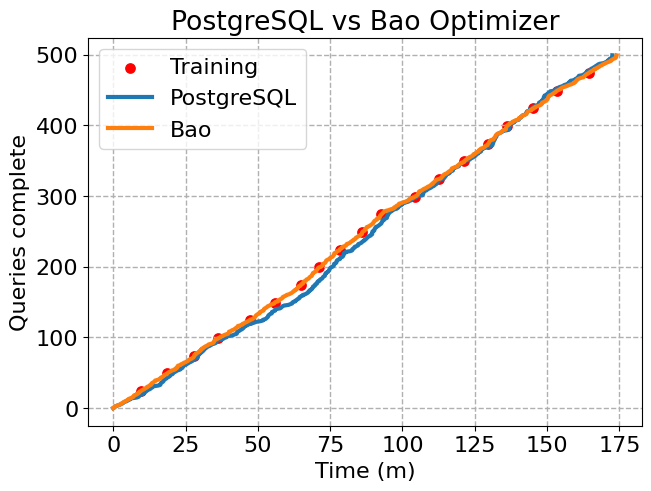

In [4]:
queries_complete = np.arange(0, len(pg_times))

fig, ax = plt.subplots(1, 1, constrained_layout=True)


train_y = []
train_rb_y = []
for tt in training_times:
    idx = np.searchsorted(bao_times, tt)
    train_y.append(idx)
    
if SHOW_RG:
    for tt in training_rb_times:
        idx = np.searchsorted(bao_rb_times, tt)
        train_rb_y.append(idx)
    
plt.scatter(training_times, train_y, s=45, color="red", label="Training")

ax.plot(pg_times, queries_complete, label="PostgreSQL", lw=3)
ax.plot(bao_times, queries_complete, label="Bao", lw=3)

if SHOW_RG:
    plt.scatter(training_rb_times, train_rb_y, s=45, color="red")
    ax.plot(bao_rb_times, queries_complete, label="Bao (w/ exploration)", lw=3)

ax.set_xlabel("Time (m)")
ax.set_ylabel("Queries complete")
ax.set_title("PostgreSQL vs Bao Optimizer")

ax.grid(linestyle="--", linewidth=1)
ax.legend()
fig.savefig("queries_vs_time.svg")

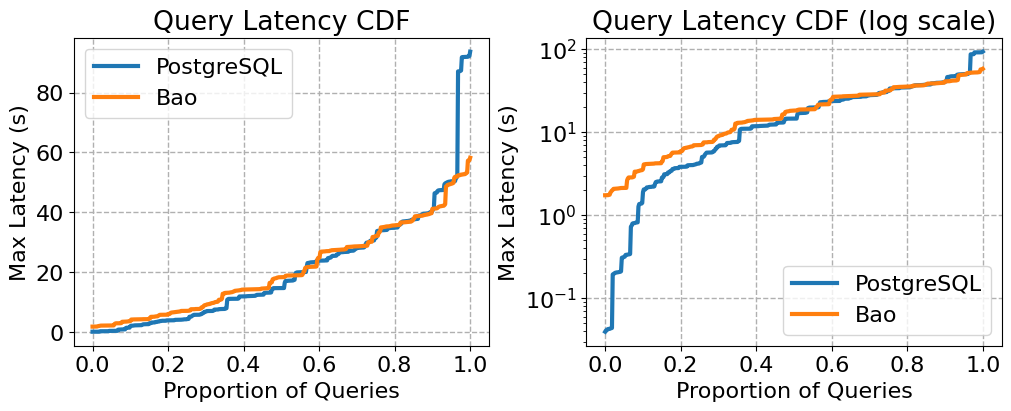

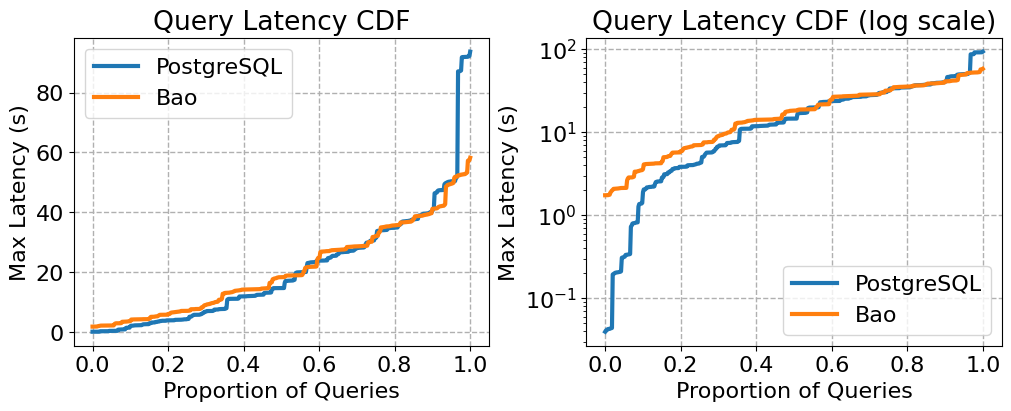

In [6]:
all_pg_times = sorted([x[4] for x in pg_data])
all_bao_times = sorted([x[4] for x in bao_data])

if SHOW_RG:
    all_bao_rb_times = sorted([x[4] for x in bao_rb_data])


fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

ax = axes[0]
ax.plot(np.linspace(0, 1, len(all_pg_times)), all_pg_times, lw=3, label="PostgreSQL")
ax.plot(np.linspace(0, 1, len(all_pg_times)), all_bao_times, lw=3, label="Bao")

if SHOW_RG:
    ax.plot(np.linspace(0, 1, len(all_pg_times)), all_bao_rb_times, lw=3, label="Bao (w/ exploration)")

ax.grid(linestyle="--", linewidth=1)
ax.set_xlabel("Proportion of Queries")
ax.set_ylabel("Max Latency (s)")
ax.set_title("Query Latency CDF")
ax.legend()
#ax.set_yscale("log")


ax = axes[1]
ax.plot(np.linspace(0, 1, len(all_pg_times)), all_pg_times, lw=3, label="PostgreSQL")
ax.plot(np.linspace(0, 1, len(all_pg_times)), all_bao_times, lw=3, label="Bao")

if SHOW_RG:
    ax.plot(np.linspace(0, 1, len(all_pg_times)), all_bao_rb_times, lw=3, label="Bao (w/ exploration)")

ax.grid(linestyle="--", linewidth=1)
ax.set_xlabel("Proportion of Queries")
ax.set_ylabel("Max Latency (s)")
ax.set_title("Query Latency CDF (log scale)")
ax.legend()
ax.set_yscale("log")
fig

In [6]:
with open("/home/zchenhj/workspace/vBao/vec_imdb_result/pg_run.txt") as f:
    data = f.read().split("\n")[2:]
data = [x.split(" ") for x in data if len(x) > 1 and (x[0] in string.digits or x[0] == "x")]

data = [(x[0], x[1], float(x[2]), x[3], float(x[4])) for x in data]
pg_data = data
pg_times = np.array([x[2] for x in pg_data])
pg_times -= np.min(pg_times)
pg_times /= 60

bao_data, bao_times, training_times = read_bao_data("/home/zchenhj/workspace/vBao/vec_imdb_result/bao_run.txt")

In [24]:
with open("/home/zchenhj/workspace/vBao/vec_imdb_result2/pg_run.txt") as f:
    data = f.read().split("\n")[2:]
data = [x.split(" ") for x in data if len(x) > 1 and (x[0] in string.digits or x[0] == "x")]

data = [(x[0], x[1], float(x[2]), x[3], float(x[4])) for x in data]
pg_data = data
pg_times2 = np.array([x[2] for x in pg_data])
pg_times2 -= np.min(pg_times2)
pg_times2 /= 60

bao_data2, bao_times2, training_times2 = read_bao_data("/home/zchenhj/workspace/vBao/vec_imdb_result2/bao_run.txt")

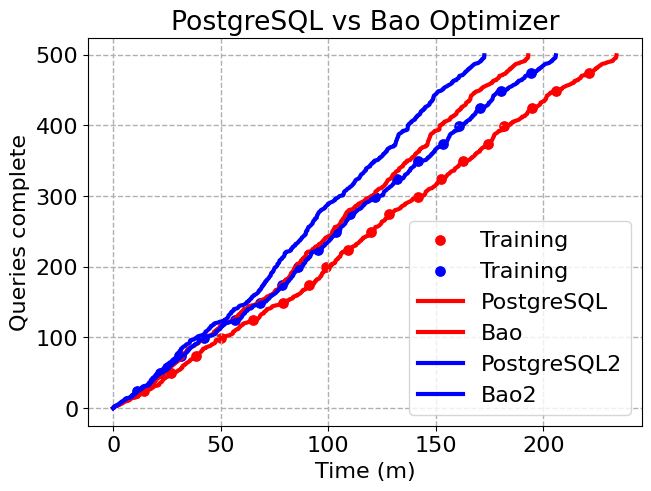

In [27]:
queries_complete = np.arange(0, len(pg_times))

fig, ax = plt.subplots(1, 1, constrained_layout=True)


train_y = []
train_rb_y = []
for tt in training_times:
    idx = np.searchsorted(bao_times, tt)
    train_y.append(idx)
    
    
train_y2 = []
train_rb_y2 = []
for tt in training_times2:
    idx = np.searchsorted(bao_times2, tt)
    train_y2.append(idx)
    
if SHOW_RG:
    for tt in training_rb_times:
        idx = np.searchsorted(bao_rb_times, tt)
        train_rb_y.append(idx)
    
plt.scatter(training_times, train_y, s=45, color="red", label="Training")
plt.scatter(training_times2, train_y, s=45, color="blue", label="Training")

ax.plot(pg_times, queries_complete, label="PostgreSQL", lw=3, color='red')
ax.plot(bao_times, queries_complete, label="Bao", lw=3, color='red')

ax.plot(pg_times2, queries_complete, label="PostgreSQL2", lw=3, color='blue')
ax.plot(bao_times2, queries_complete, label="Bao2", lw=3, color='blue')

ax.set_xlabel("Time (m)")
ax.set_ylabel("Queries complete")
ax.set_title("PostgreSQL vs Bao Optimizer")

ax.grid(linestyle="--", linewidth=1)
ax.legend()
fig.savefig("queries_vs_time.svg")